In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle as pkl
import scipy.sparse as sp
import os

import  src.const as const
import src.utils.data_utils as data_utils
import src.utils.plot_utils as plot_utils

2023-11-25 09:11:56.765 | INFO     | src.utils.plot_utils:setup_mpl:29 - matplotlib rcParams set as custom.
2023-11-25 09:11:56.767 | INFO     | src.utils.plot_utils:setup_mpl:71 - matplotlib font set as cn. Config path: d:\python312\Lib\site-packages\matplotlib\mpl-data\matplotlibrc, Cache path: C:\Users\AdamZh0u\.matplotlib
2023-11-25 09:11:56.769 | INFO     | src.const:get_project_root:22 - PROJECT_ROOT set to e:\260_Physics\Mobility-RG


In [2]:
mpl_params = plot_utils.setup_mpl(as_default=0)

2023-11-25 09:11:57.036 | INFO     | src.utils.plot_utils:setup_mpl:29 - matplotlib rcParams set as custom.


## airport network 

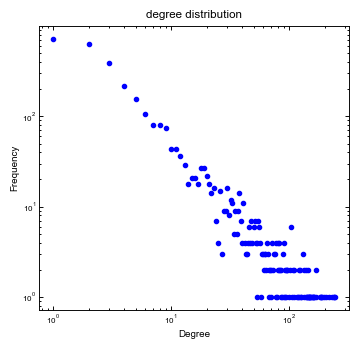

In [3]:
graph, adj, features, labels = data_utils.load_data_airport(const.DATA_PATH, return_label=True)

fig,ax = plot_utils.plot_degree_dist(graph)
# const.MPL_PARAM['save_svg'](const.PLOT_PATH /'degree_dist.svg',fig)

# 网络连边没有权重

In [4]:
def average_clustering_coefficient(G):
    # Compute average clustering coefficient
    avg_clustering_coefficient = nx.average_clustering(G)

    return avg_clustering_coefficient

def rescale_internal_degrees(G, kT):
    # Extract subgraph induced by nodes with degrees k > kT
    subgraph_nodes = [node for node, degree in G.degree() if degree > kT]
    G_kT = G.subgraph(subgraph_nodes)

    # Compute internal degrees and average internal degree
    internal_degrees = {}
    for node in G_kT.nodes():
        neighbors_in_subgraph = [neighbor for neighbor in G_kT.neighbors(node)]
        internal_degree = len(neighbors_in_subgraph)
        internal_degrees[node] = internal_degree

    avg_internal_degree = np.mean(list(internal_degrees.values()))

    # Rescale internal degrees
    rescaled_internal_degrees = {node: degree / avg_internal_degree for node, degree in internal_degrees.items()}

    return G_kT, rescaled_internal_degrees, avg_internal_degree

# Example usage
for kT in [5,10,20,50,100]:
    subgraph, rescaled_internal_degrees, avg_internal_degree = rescale_internal_degrees(graph, kT)
    print(f'average internal degrees: {avg_internal_degree}')
    ace = average_clustering_coefficient(subgraph)
    print(f'average clustering coefficient: {ace}')
    # print(f"Subgraph G({kT}): {subgraph.nodes()}")
    # print(f"Rescaled Internal Degrees: {rescaled_internal_degrees}")
    print("-" * 40)

average internal degrees: 26.766016713091922
average clustering coefficient: 0.5924902669041795
----------------------------------------
average internal degrees: 34.702312138728324
average clustering coefficient: 0.570496637120538
----------------------------------------
average internal degrees: 42.018648018648015
average clustering coefficient: 0.5715613237388857
----------------------------------------
average internal degrees: 44.56043956043956
average clustering coefficient: 0.6245833799824745
----------------------------------------
average internal degrees: 32.516129032258064
average clustering coefficient: 0.7498875128332202
----------------------------------------


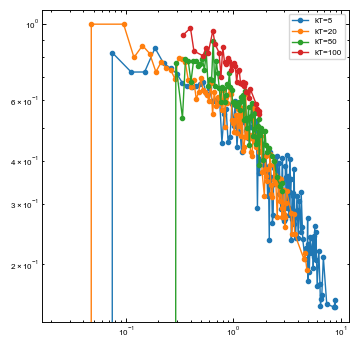

In [5]:
def degree_dependent_clustering(G, kT):
    # Extract subgraph induced by nodes with degrees k > kT
    subgraph_nodes = [node for node, degree in G.degree() if degree > kT]
    G_kT = G.subgraph(subgraph_nodes)

    # Compute internal degrees and average internal degree
    internal_degrees = {}
    for node in G_kT.nodes():
        neighbors_in_subgraph = [neighbor for neighbor in G_kT.neighbors(node)]
        internal_degree = len(neighbors_in_subgraph)
        internal_degrees[node] = internal_degree

    avg_internal_degree = np.mean(list(internal_degrees.values()))

    # Rescale internal degrees
    rescaled_internal_degrees = {node: degree / avg_internal_degree for node, degree in internal_degrees.items()}

    # Compute clustering coefficients
    clustering_coefficients = nx.clustering(G_kT)
     # 度可能也为0 # 聚类系数可能为0 
    # Collect data for plotting
    x,y  = [], []
    for node in G_kT.nodes():
        if rescaled_internal_degrees[node] > 0.0:
            x.append(rescaled_internal_degrees[node])
            y.append(clustering_coefficients[node])

    return np.array(x), np.array(y)

fig,ax = plt.subplots()
# Example usage and plotting
for kT in [5,20,50,100]:
    x_values, y_values = degree_dependent_clustering(graph, kT)
    # averge y for same x 
    x_unique = np.unique(x_values)
    y_mean = np.array([np.mean(y_values[x_values==x]) for x in x_unique])
    ax.plot(x_unique, y_mean, label=f'kT={kT}',marker='o',markersize=3)
# ax.set_ylim(0.01,1.1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

- 存在度大于0但是聚类系数为0的点
- 自相似就是重整化后拓扑特征不变
    - 度分布
    - 度-度相关性
    - 聚类